In [ ]:
https://nbviewer.jupyter.org/github/FraPochetti/KagglePlaygrounds/blob/master/RSNA-Pneumonia.ipynb

In [12]:
#Importing the Libraries
import os   #used for listing directories in a Folder, or Items in a File
import torch  # Pytorch Neural Network Package
import pandas as pd    # To import csv Files
import numpy as np      # To operate on Numpy Arrays
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader   # To create a custom DataSet in Pytorch
from torchvision import transforms, utils     # To operate on Datasets such as Normilazation
import torchvision
import pydicom    # To deal Operate on DICOM Images
import torch.nn as nn
import torch.optim as optim

In [13]:
import DataSet 
from Architecture import Net

In [63]:
trainingDataset_instance = DataSet.PnomniaData_Training(csv_file='/Users/abdulsalamyazid/Desktop/Projects/RSNA Pneumonia/Dataset/train_label.csv',
                                                root_dir = '/Users/abdulsalamyazid/Desktop/Projects/RSNA Pneumonia/Dataset/train_images/',
                                                transform = DataSet.ToTensor_Training())


trainloader = DataLoader(trainingDataset_instance , batch_size = 10,
                        shuffle = True ,num_workers = 4)


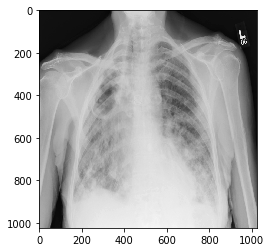

torch.Size([10, 1, 1024, 1024])


In [77]:
my_sample = next(iter(trainloader)) # get a sample of 10 images
plt.imshow(my_sample['image'].squeeze()[6],cmap='gray') #ploting the image
plt.show()
print(my_sample['image'].shape)
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


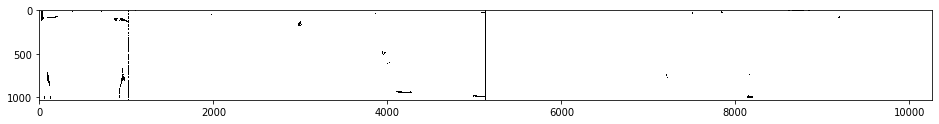

In [79]:
grid = torchvision.utils.make_grid(my_sample['image'],nrow=10)
plt.figure(figsize=(16,18))
plt.imshow(np.transpose(grid, (1,2,0)),cmap=plt.cm.bone)
plt.show()

In [34]:
#def RSNA_loss(input, target):
    #Target is the true label
    #input is the output of the neural network
    #bounding_boxes = input
    #255 is the max pixel value
    
my_tensor = torch.tensor([[1,2,3,4,5]])
print(my_tensor.shape)
boxs = my_tensor[:,:4]
label = my_tensor[:,4:5]
print(boxs)
print(label)
    

torch.Size([1, 5])
tensor([[1, 2, 3, 4]])
tensor([[5]])


In [11]:
my_net = Net()
predictions = my_net(my_sample['image'])
print(predictions.shape)
#Lets create our optimizer
#criterion = nn.MSELoss()
#optimizer = optim.SGD(net.parameters(), lr = 0.001 , momentum = 0.9 )

torch.Size([4, 4])


In [59]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i_batch, sample_batched in enumerate(trainloader):
   
        # get the inputs
        labels = sample_batched['XandYandWidthAndHight']
        inputs = sample_batched['image']
        
        print(labels.size())
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        outputs = outputs.unsqueeze(2)
        print(outputs.size())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Labels
torch.Size([4, 5, 1])
output size
torch.Size([4, 5, 1])
here1
here2
here3
Labels
torch.Size([4, 5, 1])
output size
torch.Size([4, 5, 1])
here1
here2
here3
Labels
torch.Size([4, 5, 1])
output size
torch.Size([4, 5, 1])
here1


Process Process-103:
Process Process-101:
Process Process-104:
Process Process-102:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/abdulsalamyazid/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/abdulsalamyazid/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/abdulsalamyazid/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/abdulsalamyazid/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/abdulsalamyazid/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/abdulsalamyazid/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs

KeyboardInterrupt: 